In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 1. Load Dataset (Upload sales_data_sample.csv in Colab)


In [ ]:
df = pd.read_csv("sales_data_sample.csv", encoding="latin1")
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
# Select meaningful numerical features
num_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']
data = df[num_cols].dropna()

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


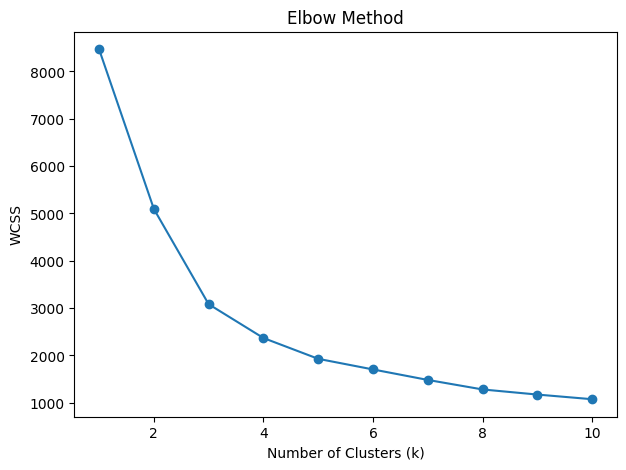

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

df[['QUANTITYORDERED','PRICEEACH','SALES','Cluster']].head()


,QUANTITYORDERED,PRICEEACH,SALES,Cluster
0,30,95.70,2871.00,3
1,34,81.35,2765.90,3
2,41,94.74,3884.34,1
3,45,83.26,3746.70,0
4,49,100.00,5205.27,1


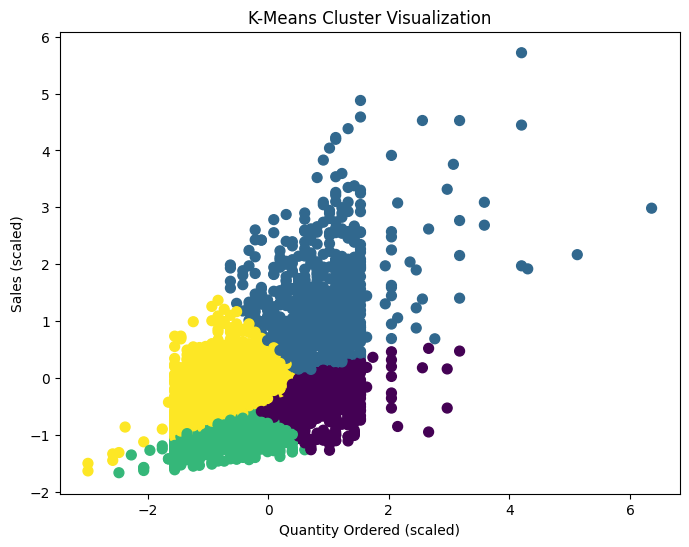

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(scaled_data[:,0], scaled_data[:,2], c=df['Cluster'], s=50)
plt.xlabel('Quantity Ordered (scaled)')
plt.ylabel('Sales (scaled)')
plt.title('K-Means Cluster Visualization')
plt.show()


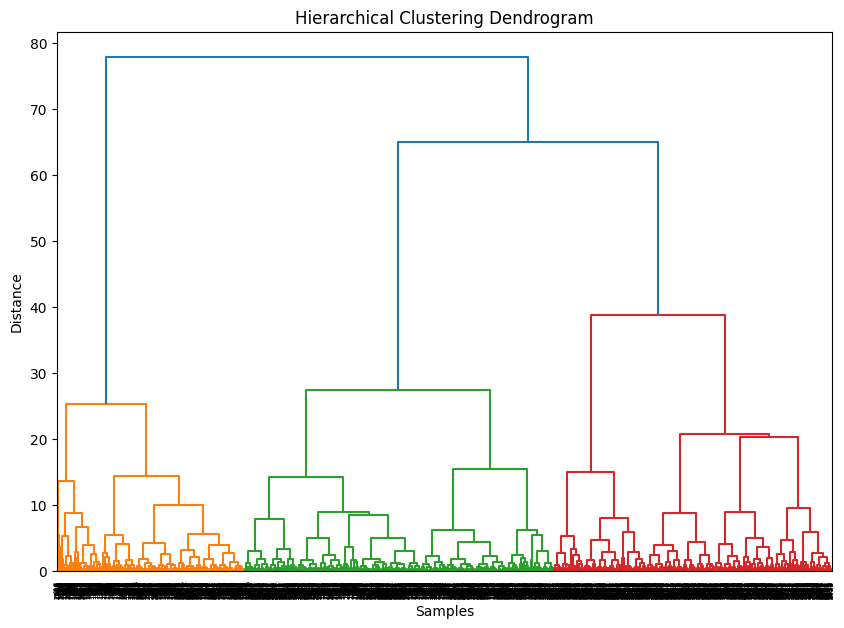

In [ ]:
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [ ]:
df['H_Cluster'] = fcluster(linked, 4, criterion='maxclust')

df[['QUANTITYORDERED','PRICEEACH','SALES','H_Cluster']].head()


,QUANTITYORDERED,PRICEEACH,SALES,H_Cluster
0,30,95.70,2871.00,2
1,34,81.35,2765.90,2
2,41,94.74,3884.34,1
3,45,83.26,3746.70,3
4,49,100.00,5205.27,1
